# **Logistic Regression**

## **1. Theory and Equations**

**Logistic Regression** is a classification algorithm that predicts probabilities using a logistic sigmoid function. Core components:

**Sigmoid Function**:
 $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

**Explanation**:  
- Maps any real number \( z \) to the range \((0, 1)\).  
- Acts as a probability "squasher":  

 **Hypothesis Function**:
 $$ h_\theta(x) = \sigma(\theta^T x) $$
 
 **Log Loss Cost Function**:
 $$ J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(h_\theta(x_i)) + (1-y_i)\log(1-h_\theta(x_i))] $$
 
 **Gradient Descent Updates**:
 $$ \theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j} $$
 
 Partial Derivatives:
 $$ \frac{\partial J}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)x_{ij} $$
 
 ## **2. Key Assumptions**
 
 1. Binary outcome variable
 2. Linear relationship between log-odds and features
 3. No multicollinearity
 4. Large sample size (n ≥ 10 * features)
 
 ## **3. Implementation from Scratch**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

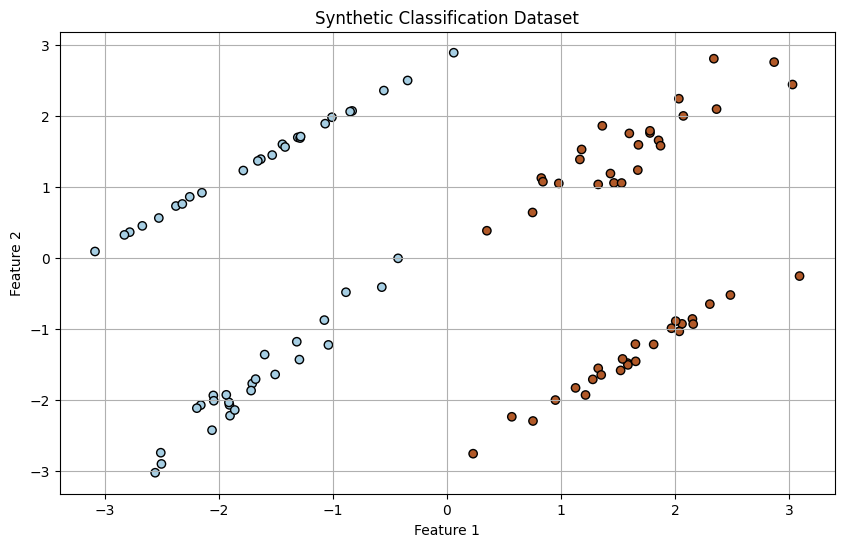

In [3]:
# Generate synthetic data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=1.5,
    random_state=42
)

# Visualize dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

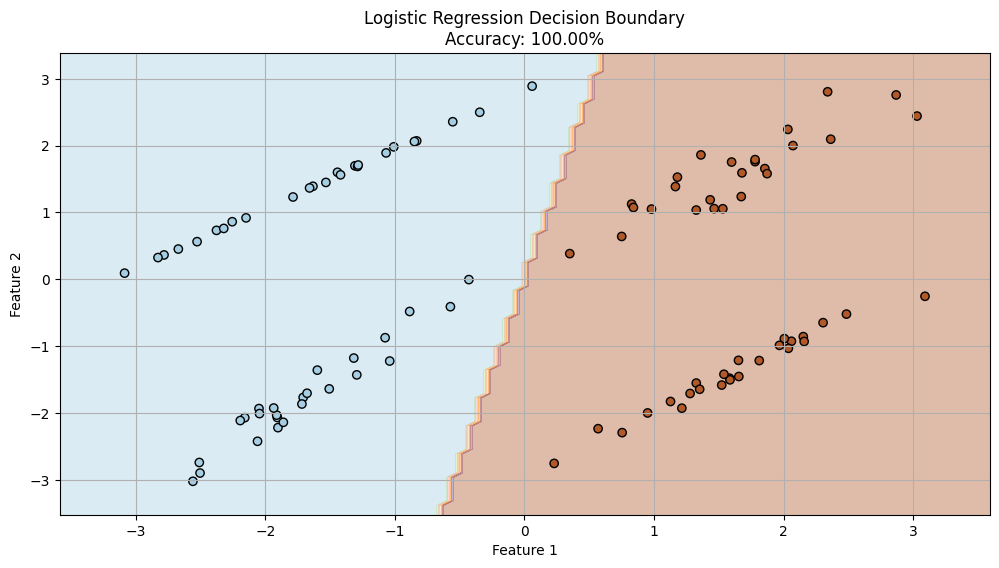

In [4]:
model = LogisticRegression(learning_rate=0.1, n_iters=3000)
model.fit(X, y)

# Calculate metrics
train_acc = model.accuracy(X, y)
probabilities = model.predict_proba(X)

# Decision boundary visualization
x1_min, x1_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
x2_min, x2_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                     np.linspace(x2_min, x2_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot results
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {train_acc:.2%}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [5]:
# Print learned parameters
print("Learned Parameters:")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias:.4f}")

Learned Parameters:
Weights: [ 5.08252916 -0.91623175]
Bias: 0.0438


In [6]:
# Calculate confusion matrix
predictions = model.predict(X)

# Compute components of the confusion matrix
TP = np.sum((predictions == 1) & (y == 1))
TN = np.sum((predictions == 0) & (y == 0))
FP = np.sum((predictions == 1) & (y == 0))
FN = np.sum((predictions == 0) & (y == 1))

# Create the confusion matrix
confusion_matrix = np.array([[TN, FP],
                             [FN, TP]])

print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[50  0]
 [ 0 50]]


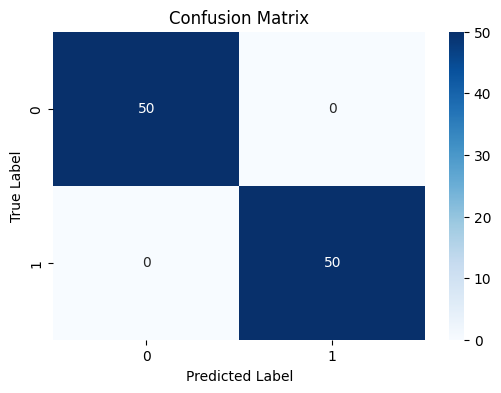

In [7]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()